#### Ejercicio: Mejora del ejercicio de clasificación (práctica 2.0) mediante reducción de dimensiones

__Paso 1__. Repetimos el ejercicio de clasficación de la anterior práctica (sistema de Machine Learning predictivo) sobre datos de fraude bancario

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Leemos los datos de fraude y revisamos el contenido del csv
df = pd.read_csv("./Data/creditcard.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [2]:
#Revisamos cuántas transacciones son correctas (Class = 0) y fraudulentas (Class = 1)
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [3]:
#Extraemos los nombres de las columnas que usaremos para aprender (todas menos la última)
features = df.columns[0:30]

X = df[features].to_numpy()
print(f"Tamaño de nuestro dataset inicial: {X.shape}")

Tamaño de nuestro dataset inicial: (284807, 30)


In [4]:
#Extraemos el nombre de la columna target (la columna Class, que es la última)
target   = df.columns[-1]

y = df[target].to_numpy()
print(f"Tamaño de etiquetas iniciales: {y.shape}")

Tamaño de etiquetas iniciales: (284807,)


In [5]:
#Hacemos la segmentacion del dataset inicial en entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 111)
print(f"Tamaño dataset entrenamiento: {X_train.shape}")
print(f"Tamaño dataset test: {X_test.shape}")

Tamaño dataset entrenamiento: (199364, 30)
Tamaño dataset test: (85443, 30)


In [6]:
#Definimos un objeto DecisionTreeClassifier, y usamos el hiperparámetro random_state = 101
from sklearn.tree import DecisionTreeClassifier
classifier_tree = DecisionTreeClassifier(random_state = 101)

#Entrenamos con los datos de entrenamiento
classifier_tree.fit(X_train, y_train)

#Predecimos sobre los datos de test
y_predict = classifier_tree.predict(X_test)
print(f"Numero de operaciones en test: {y_test.shape}")
print(f"Numero de operaciones 'Legales' en test: {y_test.shape[0]-np.sum(y_test)}")
print(f"Numero de operaciones 'Fraude' en test:  {np.sum(y_test)}")
print(f"Numero de veces que se ha equivocado mi sistema: {np.sum(np.abs(y_test-y_predict))}")

Numero de operaciones en test: (85443,)
Numero de operaciones 'Legales' en test: 85290
Numero de operaciones 'Fraude' en test:  153
Numero de veces que se ha equivocado mi sistema: 84


In [7]:
#Analizamos la matriz de confusion
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)
print(cm)

[[85236    54]
 [   30   123]]


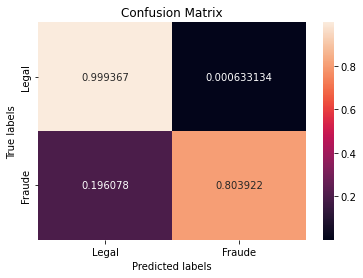

In [8]:
#(EXTRA) Sacamos una matriz de confusión más detallada
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
cm_normalized = np.array([cm[0]/cm.sum(axis=1)[0], cm[1]/cm.sum(axis=1)[1]])
sns.heatmap(cm_normalized, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Legal', 'Fraude']); ax.yaxis.set_ticklabels(['Legal', 'Fraude']);

__Paso 2__. Repetimos el ejercicio de clasficación pero aplicando escalado de datos y reducción de dimensiones y comparamos resultados

* Normalización de los datos

In [9]:
#Importamos la clase StandardScaler del paquete preprocessing de sklearn
from sklearn.preprocessing import StandardScaler

#Generamos una instancia de un objeto StandardScaler
ss = StandardScaler()

#Normalizmos con fit_transform (calcula y aplica la normalización a la vez sobre los datos)
X_train_scaled = ss.fit_transform(X_train)

* Análisis de reducción de dimensiones

In [10]:
#Cuántas dimensiones tienen nuestros datos?
print(f'Nuestros datos tienen originalmente {X_train_scaled.shape[1]} dimensiones')

Nuestros datos tienen originalmente 30 dimensiones


In [11]:
#Importamos la clase PCA del paquete decomposition de sklearn
from sklearn.decomposition import PCA

#Primero vamos a 'no-reducir' las dimensiones
#Generamos una variable PCA de 30 dimensiones (hiperparametro n_componentes = 30)
pca = PCA(n_components=30)

#Entrenamos y transformamos nuestros datos
X_train_reduced = pca.fit_transform(X_train_scaled)

¿Si no hemos reducido dimensiones, para qué sirve lo que hemos hecho? --> Para analizar la cantidad de información que va con cada dimensión PCA

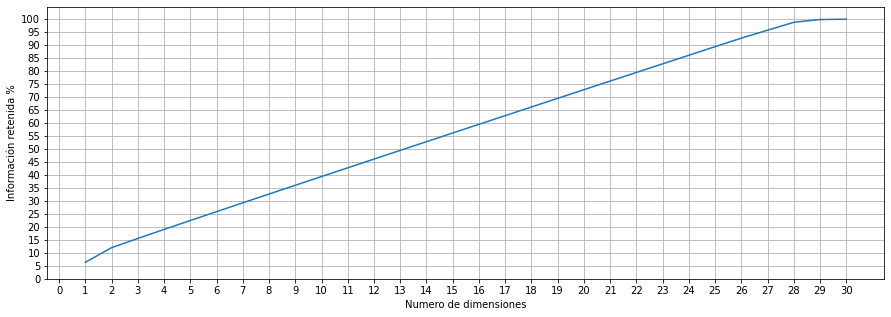

In [12]:
#Ploteamos la cantidad de información que va con cada dimensión
plt.figure(figsize=(15,5))
plt.plot(np.arange(30)+1,np.cumsum(pca.explained_variance_ratio_*100))
plt.xticks(range(31))
plt.yticks(np.arange(0,101,5))
plt.xlabel("Numero de dimensiones")
plt.ylabel("Información retenida %")
plt.grid()

¡¡Las dos últimas dimensiones no aportan información!!

Las 28 primeras dimensiones tienen el 99% del a información, así que podemos reducir sin peligro

* Reducción de dimensiones y nuevo clasificador

In [13]:
#Repetimos la operación de reducción, pero ahora para 28 dimensiones 
pca = PCA(n_components=28) #Equivalente a PCA(n_components = 0.99)

X_train_reduced = pca.fit_transform(X_train_scaled)

In [14]:
#Hacemos un nuevo clasificador y lo entrenamos con los datos tras reducir sus dimensiones
classifier_tree_after_pca = DecisionTreeClassifier(random_state = 1)
classifier_tree_after_pca.fit(X_train_reduced, y_train)

DecisionTreeClassifier(random_state=1)

In [15]:
#Aplicamos la reducción de dimensiones a los datos de test y hacemos predicciones

#Primero los normalizamos con el mismo scaler que los datos de train
X_test_scaled = ss.transform(X_test)

#Luego aplicamos la reducción de dimensiones
X_test_reduced = pca.transform(X_test_scaled)

#Finalmente hacemos predicciones
y_new_predict = classifier_tree_after_pca.predict(X_test_reduced)
print(f"Numero de operaciones en test: {y_test.shape}")
print(f"Numero de operaciones 'Legales' en test: {y_test.shape[0]-np.sum(y_test)}")
print(f"Numero de operaciones 'Fraude' en test:  {np.sum(y_test)}")
print(f"Numero de veces que se ha equivocado mi sistema: {np.sum(np.abs(y_test-y_new_predict))}")

Numero de operaciones en test: (85443,)
Numero de operaciones 'Legales' en test: 85290
Numero de operaciones 'Fraude' en test:  153
Numero de veces que se ha equivocado mi sistema: 75


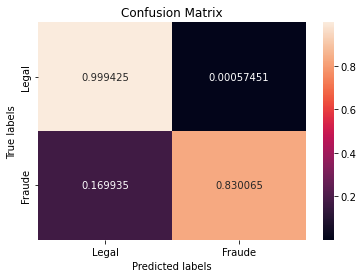

In [16]:
#Calculamos la matriz de confusión tras la reducción y la comparamos con la anterior
cm = confusion_matrix(y_test, y_new_predict)
ax= plt.subplot()
cm_normalized = np.array([cm[0]/cm.sum(axis=1)[0], cm[1]/cm.sum(axis=1)[1]])
sns.heatmap(cm_normalized, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Legal', 'Fraude']); ax.yaxis.set_ticklabels(['Legal', 'Fraude']);